In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the csv file using pandas library

In [3]:
data_file = pd.read_csv("google-cluster-data-1.csv")

View the first five elements of the dataset


In [4]:
data_file.head()


,Time,ParentID,TaskID,JobType,NrmlTaskCores,NrmlTaskMem
0,90000,757745334,1488529826,0,0.000000,0.031130
1,90000,975992247,1488529821,0,0.000000,0.000000
2,90000,1468458091,1488529832,1,0.021875,0.002353
3,90000,1460281235,1488529840,0,0.000000,0.000000
4,90000,1164728954,1488529835,0,0.003125,0.001638


# Exploratory Data Analysis
We search for null values in the dataset

In [5]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
Time             1048575 non-null int64
ParentID         1048575 non-null int64
TaskID           1048575 non-null int64
JobType          1048575 non-null int64
NrmlTaskCores    1048575 non-null float64
NrmlTaskMem      1048575 non-null float64
dtypes: float64(2), int64(4)
memory usage: 56.0 MB


Visualise the probability distribuition of all 4 columns of the data

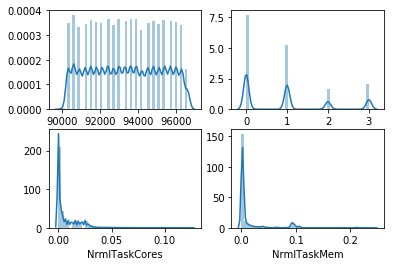

In [6]:
fig = plt.figure()

plt.subplot(2,2,1)
sns.distplot(data_file["Time"])

plt.subplot(2,2,2)
sns.distplot(data_file["JobType"])

plt.subplot(2,2,3)
sns.distplot(data_file["NrmlTaskCores"])

plt.subplot(2,2,4)
sns.distplot(data_file["NrmlTaskMem"])

As seen above the job type data is a little skewed since more data entries are found with respect to job 0 and less with respect to job 2. Similarly number of cores and amount of memory used per task tends to move towards 0

# Approach 1
We come across many job id's and parent id's, what we do is we group the data according to parent id's and then check how each parent is behaving while performing each task

In [7]:
groups = data_file.groupby("TaskID")

The following code checks the number of data entries under each group of parents

In [9]:
g_dict = groups.groups
len_df = []
keys = g_dict.keys()
for i in range(len(list(keys))):
    len_df.append(len(groups.get_group(list(keys)[i])))
    

We visualise the above data to get an estimate 

In [20]:
test_df1 = groups.get_group(list(keys)[3])
test_df2 = groups.get_group(list(keys)[1])


##### As we can see the number of data entries under each number are very skewed

We group the data according to the task id since every task runs on an individual machine

In [ ]:

#PLOT TEST DATA
fig = plt.figure()
plt.subplot(2,1,1)
sns.lineplot(test_df["Time"],test_df["NrmlTaskCores"])
plt.subplot(2,1,2)
sns.lineplot(test_df["Time"],test_df["NrmlTaskMem"])


This is one group of the data that we have plotted, it clearly shows the variation in the use of Cores and Memory while executing the task

In [ ]:
relevant_keys = []
for i in range(len(list(keys))):
    g_df = groups.get_group(list(keys)[i])
    if(len(g_df)>1):
        relevant_keys.append(list(keys)[i])

We remove all entries consisting of a single entry since they provide us with no information about the trend of use of processor cores and cpu memory

In [ ]:

x_arr = np.arange(len(relevant_keys))
y_arr = []
for i in relevant_keys:
    y_arr.append(len(groups.get_group(i)))


In [17]:
test_df1 = test_df1.set_index("Time")
test_df2 = test_df2.set_index("Time")

In [23]:
res = test_df1.merge(test_df2,on="Time",how="inner")

In [26]:
### MODIFIED K-MEANS ALGORITHM DEFINITION ###
# 1. Choose number of clusters
# 2. Subtract the two groups where the timestamps are the same and square it
# 3. Add the total error up, do this for all three custom centroids
# 4. Find new centroids and repeat the entire process
test_result_df = pd.DataFrame()
test_result_df["NrmlTaskCores_diff"] = res["NrmlTaskCores_x"] - res["NrmlTaskCores_y"]
test_result_df["Time"] = res["Time"]

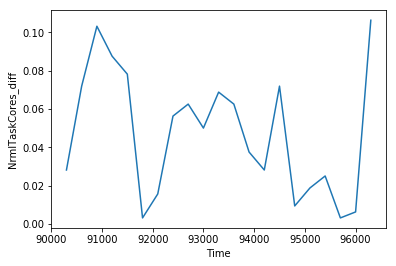

In [28]:
sns.lineplot("Time","NrmlTaskCores_diff",data=test_result_df)

In [29]:
##Problem: What to do after on iteration?
##We can have a tuple of cluster labels and time series groups 
##How to find a new centroid?
##Take an average of all values in a row of the time series


In [ ]:
data_cluster = pd.DataFrame()
data_cluster["Indices"] = req_df.index.values
data_cluster["Labels"] = classifier.labels_


In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
sns.lineplot(req_df["Time"],req_df["NrmlTaskCores"])
plt.subplot(2,1,2)
sns.lineplot(req_df["Time"],req_df["NrmlTaskMem"])

In [ ]:
#Use the custom fit algorithm
groups.get_group(list(relevant_keys)[0])
    




